<a href="https://colab.research.google.com/github/sheikh-sahira1703/stonks/blob/master/Simplified_Stock_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import pandas as pd
import re
import seaborn as sns
from pandas_datareader import data
from pandas_datareader.data import DataReader
from datetime import datetime
from scipy import stats
import statistics
import matplotlib.pyplot as plt
from scipy.stats import skew
np.set_printoptions(threshold=np.inf) #displaying full numpy array without truncation
pd.set_option("display.max_rows", None, "display.max_columns", None) #displaying full pandas dataframe without truncation
import plotly.express as ff
import module as mod

In [2]:
print('User Inputs')
print('Enter quit to stop')
stock_list = list()
while True:
  stock = input('Enter a stock name according to yahoo finance search: ')
  if stock.upper().startswith('QUIT'):
    break
  else:
    stock_list.append(stock.upper())
from_date = input('Enter the from date in yyyy/mm/dd format ')
from_date = re.split('-|/', from_date)
to_date = input('Enter the to date in yyyy/mm/dd format ')
to_date = re.split('-|/', to_date)
for i in range(len(from_date)):
  from_date[i] = int(from_date[i])
for j in range(len(to_date)):
  to_date[j] = int(to_date[j])

User Inputs
Enter quit to stop
Enter a stock name according to yahoo finance search: infy.ns
Enter a stock name according to yahoo finance search: tcs.ns
Enter a stock name according to yahoo finance search: wipro.ns
Enter a stock name according to yahoo finance search: cipla.ns
Enter a stock name according to yahoo finance search: bhel.ns
Enter a stock name according to yahoo finance search: quit
Enter the from date in yyyy/mm/dd format 2020-01-01
Enter the to date in yyyy/mm/dd format 2020-09-30


In [3]:
column_name = input('Enter the column you would like to consider for analysis (case sensitive): ')
final_dataframe = pd.DataFrame()
try:
  for stock in stock_list:
    historical_data = DataReader(stock,  "yahoo", datetime(from_date[0], from_date[1], from_date[2]), datetime(to_date[0], to_date[1], to_date[2]))
    final_dataframe[stock] = historical_data[column_name]
except:
  print('Please enter a valid input')
final_dataframe = final_dataframe.dropna()

Enter the column you would like to consider for analysis (case sensitive): Adj Close


In [4]:
return_dataframe = final_dataframe.pct_change()
return_dataframe = return_dataframe.dropna()
return_dataframe.columns = stock_list

final_dataframe.index = pd.to_datetime(final_dataframe.index, format="%Y%m")
return_dataframe.index = pd.to_datetime(return_dataframe.index, format="%Y%m")
final_dataframe.index = final_dataframe.index.to_period('D')
return_dataframe.index = return_dataframe.index.to_period('D')

In [6]:
print('This notebook can analyse the stocks on the basis of following plots')
print('1) Histogram')
print('2) Boxplots')
print('3) Time Series')
print('4) Comparitive Analysis')

This notebook can analyse the stocks on the basis of following plots
1) Histogram
2) Boxplots
3) Time Series
4) Comparitive Analysis


In [7]:
choice_hist = input('Would you like to analyse based on Histograms? ')
choice_box = input('Would you like to analyse based on Boxplots? ')
choice_ts = input('Would you like to analyse based on Time Series? ')
choice_comparitive = input('Would you like to do a comparitive analysis? ')
choice_col = input('Would you like to analyse returns or {col} or both? '.format(col = column_name))

Would you like to analyse based on Histograms? yes
Would you like to analyse based on Boxplots? yes
Would you like to analyse based on Time Series? yes
Would you like to do a comparitive analysis? yes
Would you like to analyse returns or Adj Close or both? both


In [8]:
if choice_hist.upper().startswith('Y') or choice_hist.upper().startswith('B'):
    if choice_col.upper().startswith('R') or choice_col.upper().startswith('B'):
        print('Histograms for returns')
        title = f'Histograms for the returns of {stock}'
        for stock in stock_list:
            fig = mod.plot_histogram(return_dataframe, stock, parameter=column_name, title=title)
            fig.show()
    if choice_col.upper().startswith(column_name.upper()) or choice_col.upper().startswith('B'): 
        title = f'Histogram for the {column_name} of the stock {stock}'
        for stock in stock_list:
            fig = mod.plot_histogram(final_dataframe, stock, parameter = column_name, title=title)
            fig.show()

Histograms for returns
The histogram shows that the Adj Close of INFY.NS, oscillate around -0.10039299489299047
The average Adj Close of this INFY.NS is 0.0021657589529680272
The median Adj Close of this INFY.NS is 0.0012645420145389608
This INFY.NS is positively skewed which indicates that there are more positive returns which is a good sign for the stock
This is supported by the more number of peaks and higher peaks on the positive side of the histogram after the meidan


The histogram shows that the Adj Close of TCS.NS, oscillate around -0.0941033727333842
The average Adj Close of this TCS.NS is 0.001170579687650885
The median Adj Close of this TCS.NS is 0.0008793160417797097
This TCS.NS is negatively skewed which indicates that there are more negative returns which is a bad sign for the stock
This is supported by the more number of peaks and higher peaks on the negative side of the histogram before the meidan


The histogram shows that the Adj Close of WIPRO.NS, oscillate around 0.0
The average Adj Close of this WIPRO.NS is 0.0015990059360335004
The median Adj Close of this WIPRO.NS is 0.00075684601521675
This WIPRO.NS is positively skewed which indicates that there are more positive returns which is a good sign for the stock
This is supported by the more number of peaks and higher peaks on the positive side of the histogram after the meidan


The histogram shows that the Adj Close of CIPLA.NS, oscillate around -0.06849961573296859
The average Adj Close of this CIPLA.NS is 0.002950564866389751
The median Adj Close of this CIPLA.NS is -0.0008834140036085292
This CIPLA.NS is positively skewed which indicates that there are more positive returns which is a good sign for the stock
This is supported by the more number of peaks and higher peaks on the positive side of the histogram after the meidan


The histogram shows that the Adj Close of BHEL.NS, oscillate around 0.0
The average Adj Close of this BHEL.NS is -0.0012003986020602524
The median Adj Close of this BHEL.NS is -0.0023814481196696713
This BHEL.NS is positively skewed which indicates that there are more positive returns which is a good sign for the stock
This is supported by the more number of peaks and higher peaks on the positive side of the histogram after the meidan


The histogram shows that the Adj Close of INFY.NS, oscillate around 664.652587890625
The average Adj Close of this INFY.NS is 778.8798934694321
The median Adj Close of this INFY.NS is 757.2421875
This INFY.NS is positively skewed which indicates that there are more positive returns which is a good sign for the stock
This is supported by the more number of peaks and higher peaks on the positive side of the histogram after the meidan


The histogram shows that the Adj Close of TCS.NS, oscillate around 2165.411376953125
The average Adj Close of this TCS.NS is 2086.0682250330688
The median Adj Close of this TCS.NS is 2118.8955078125
This TCS.NS is negatively skewed which indicates that there are more negative returns which is a bad sign for the stock
This is supported by the more number of peaks and higher peaks on the negative side of the histogram before the meidan


The histogram shows that the Adj Close of WIPRO.NS, oscillate around 187.0500030517578
The average Adj Close of this WIPRO.NS is 235.6190284042762
The median Adj Close of this WIPRO.NS is 239.89999389648438
This WIPRO.NS is positively skewed which indicates that there are more positive returns which is a good sign for the stock
This is supported by the more number of peaks and higher peaks on the positive side of the histogram after the meidan


The histogram shows that the Adj Close of CIPLA.NS, oscillate around 472.2733154296875
The average Adj Close of this CIPLA.NS is 589.6517453471189
The median Adj Close of this CIPLA.NS is 620.6500244140625
This CIPLA.NS is negatively skewed which indicates that there are more negative returns which is a bad sign for the stock
This is supported by the more number of peaks and higher peaks on the negative side of the histogram before the meidan


The histogram shows that the Adj Close of BHEL.NS, oscillate around 38.0
The average Adj Close of this BHEL.NS is 33.12301602439275
The median Adj Close of this BHEL.NS is 35.25
This BHEL.NS is negatively skewed which indicates that there are more negative returns which is a bad sign for the stock
This is supported by the more number of peaks and higher peaks on the negative side of the histogram before the meidan


In [9]:
if choice_box.upper().startswith('Y') or choice_hist.upper().startswith('B'):
    if choice_col.upper().startswith('R') or choice_col.upper().startswith('B'):
        print('Boxplot for returns')
        title = f'Boxplot for the returns of {stock}'
        for stock in stock_list:
            fig = mod.plot_boxplot(return_dataframe, stock, parameter=column_name, title=title)
            fig.show()
    if choice_col.upper().startswith(column_name.upper()) or choice_col.upper().startswith('B'): 
        print(f'Boxplot for {column_name}')
        title = f'Boxplot for the {column_name} of the stock {stock}'
        for stock in stock_list:
            fig = mod.plot_boxplot(final_dataframe, stock, parameter = column_name, title=title)
            fig.show()

Boxplot for returns
From this boxplot we can see that the median Adj Close of this stock INFY.NS is 0.0012645420145389608
From this boxplot we can see that there are more positive Adj Close in this stock
This can be seen in the boxplot as there are more Adj Close above the median i.e there is more data above the median than below the median
Please watch out for the outliers


From this boxplot we can see that the median Adj Close of this stock TCS.NS is 0.0008793160417797097
From this boxplot we can see that there are more negative Adj Close in this stock
This can be seen in the boxplot as there are more Adj Close below the median i.e there is more data below the median than above the median
Please watch out for the outliers


From this boxplot we can see that the median Adj Close of this stock WIPRO.NS is 0.00075684601521675
From this boxplot we can see that there are more positive Adj Close in this stock
This can be seen in the boxplot as there are more Adj Close above the median i.e there is more data above the median than below the median
Please watch out for the outliers


From this boxplot we can see that the median Adj Close of this stock CIPLA.NS is -0.0008834140036085292
From this boxplot we can see that there are more positive Adj Close in this stock
This can be seen in the boxplot as there are more Adj Close above the median i.e there is more data above the median than below the median
Please watch out for the outliers


From this boxplot we can see that the median Adj Close of this stock BHEL.NS is -0.0023814481196696713
From this boxplot we can see that there are more positive Adj Close in this stock
This can be seen in the boxplot as there are more Adj Close above the median i.e there is more data above the median than below the median
Please watch out for the outliers


Boxplot for Adj Close
From this boxplot we can see that the median Adj Close of this stock INFY.NS is 757.2421875
From this boxplot we can see that there are more positive Adj Close in this stock
This can be seen in the boxplot as there are more Adj Close above the median i.e there is more data above the median than below the median
Please watch out for the outliers


From this boxplot we can see that the median Adj Close of this stock TCS.NS is 2118.8955078125
From this boxplot we can see that there are more negative Adj Close in this stock
This can be seen in the boxplot as there are more Adj Close below the median i.e there is more data below the median than above the median
Please watch out for the outliers


From this boxplot we can see that the median Adj Close of this stock WIPRO.NS is 239.89999389648438
From this boxplot we can see that there are more positive Adj Close in this stock
This can be seen in the boxplot as there are more Adj Close above the median i.e there is more data above the median than below the median
Please watch out for the outliers


From this boxplot we can see that the median Adj Close of this stock CIPLA.NS is 620.6500244140625
From this boxplot we can see that there are more negative Adj Close in this stock
This can be seen in the boxplot as there are more Adj Close below the median i.e there is more data below the median than above the median
Please watch out for the outliers


From this boxplot we can see that the median Adj Close of this stock BHEL.NS is 35.25
From this boxplot we can see that there are more negative Adj Close in this stock
This can be seen in the boxplot as there are more Adj Close below the median i.e there is more data below the median than above the median
Please watch out for the outliers


The maximum returns was observed on 2020-03-24
The minimum returns was observed on 2020-03-23


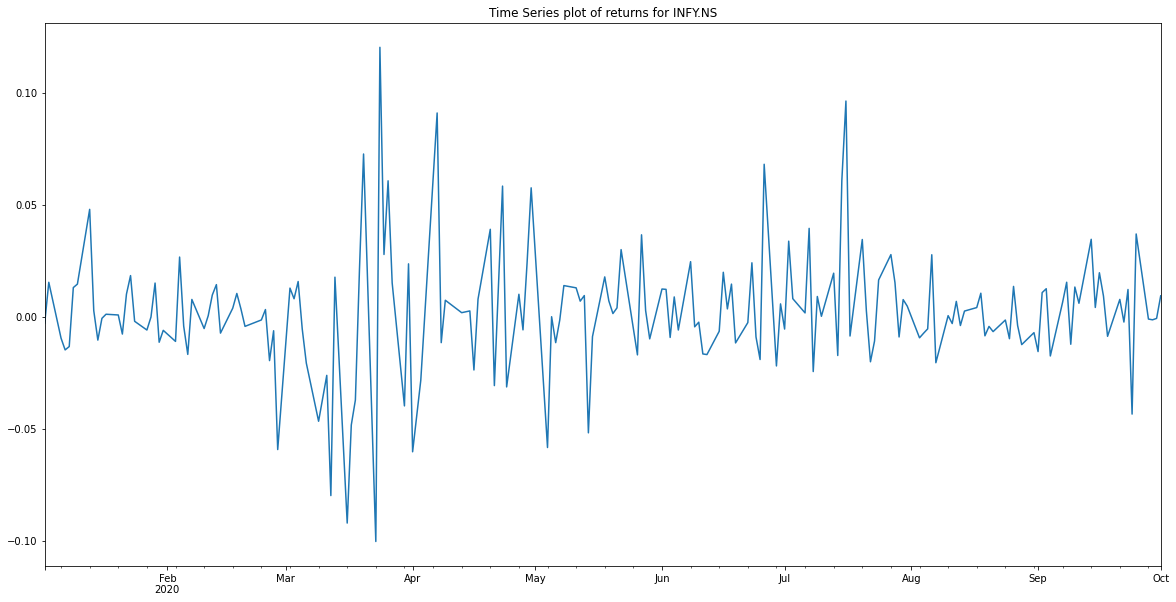

The maximum returns was observed on 2020-03-20
The minimum returns was observed on 2020-03-12


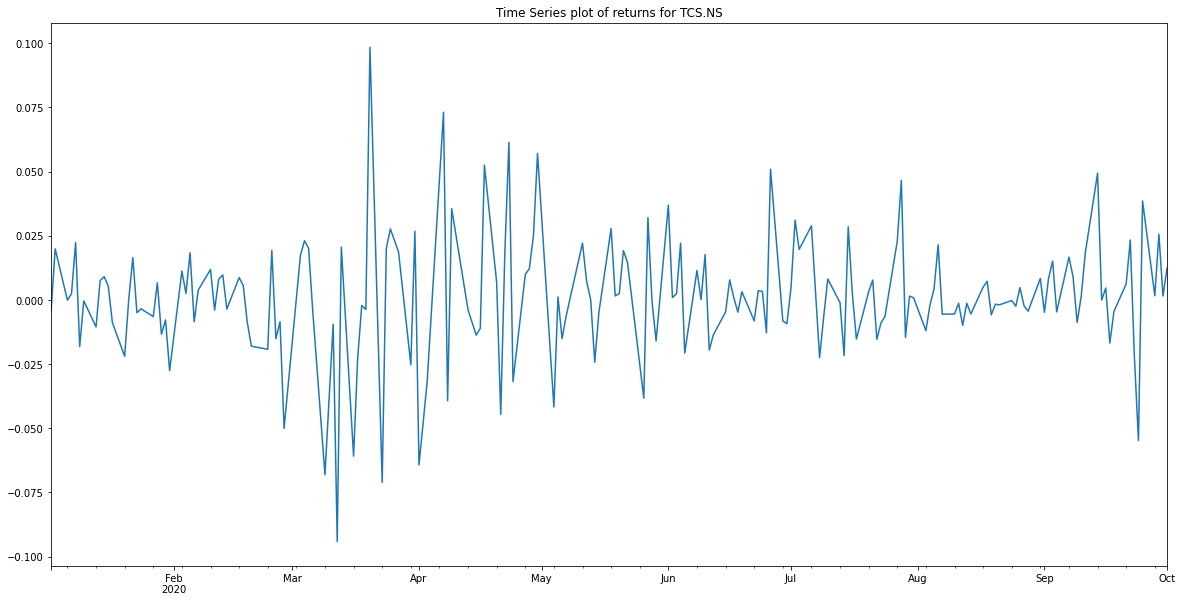

The maximum returns was observed on 2020-07-15
The minimum returns was observed on 2020-03-16


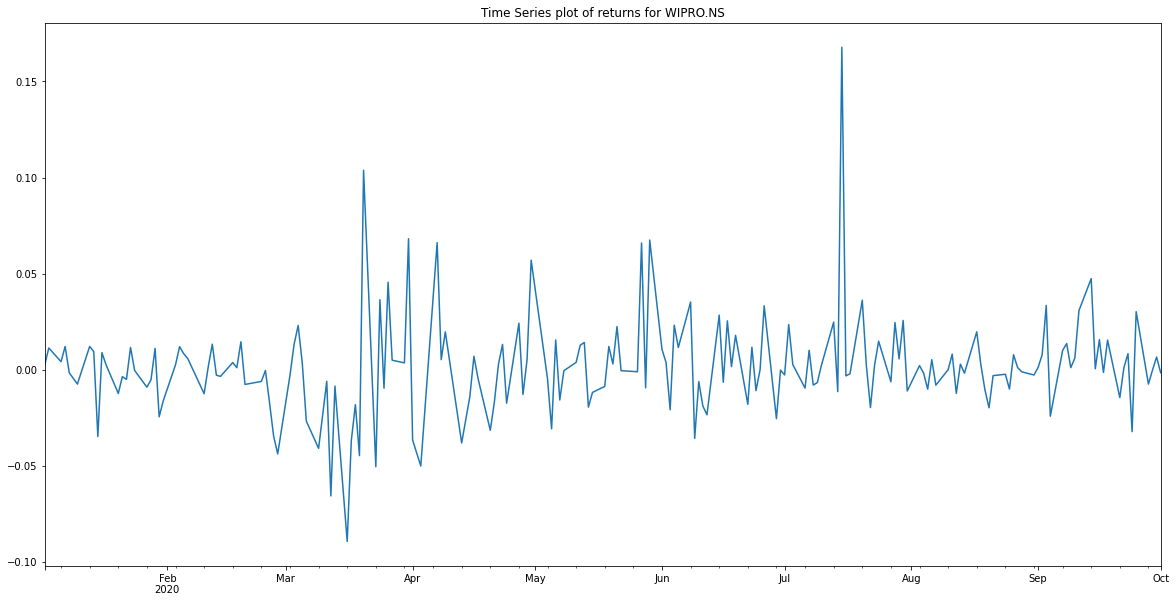

The maximum returns was observed on 2020-04-09
The minimum returns was observed on 2020-03-16


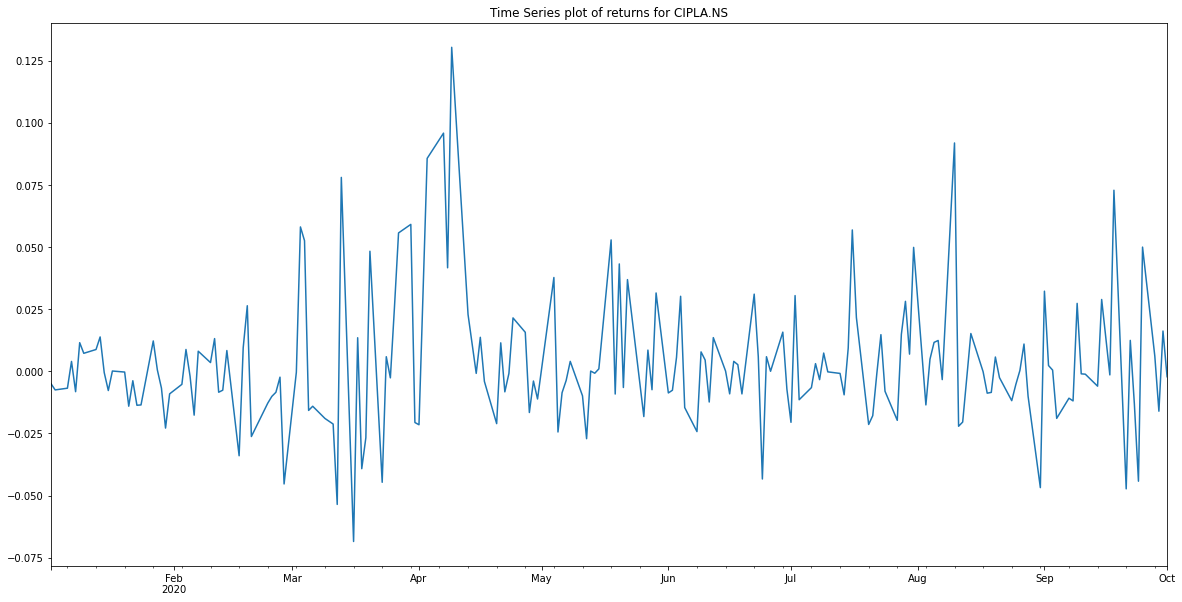

The maximum returns was observed on 2020-05-13
The minimum returns was observed on 2020-03-23


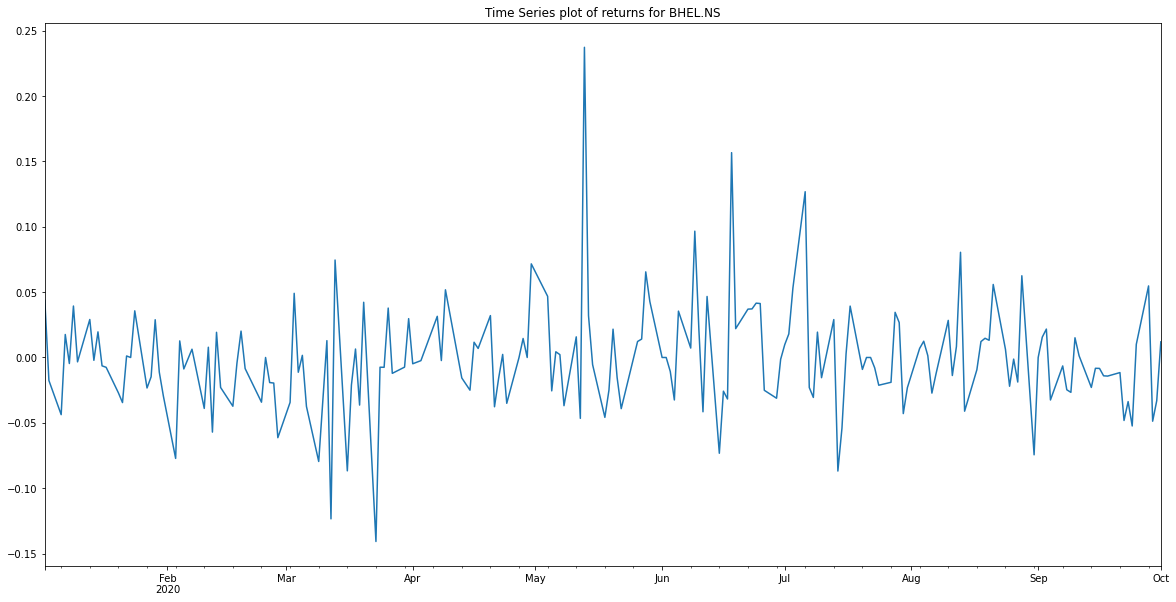

The maximum Adj Close was observed on 2020-09-23
The minimum Adj Close was observed on 2020-03-23


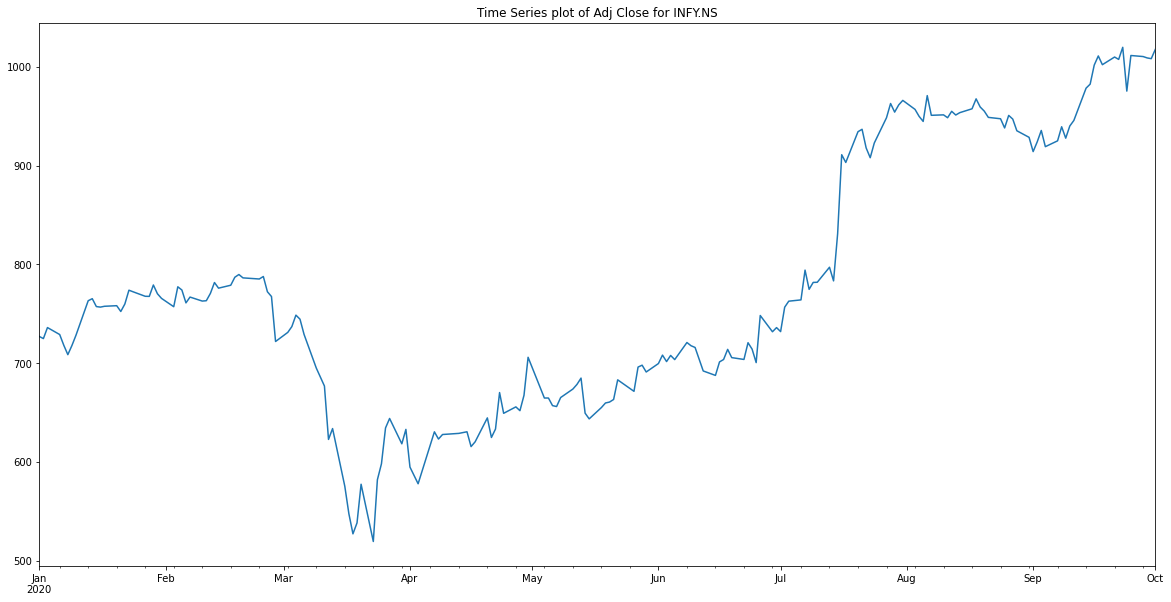

The maximum Adj Close was observed on 2020-10-01
The minimum Adj Close was observed on 2020-03-19


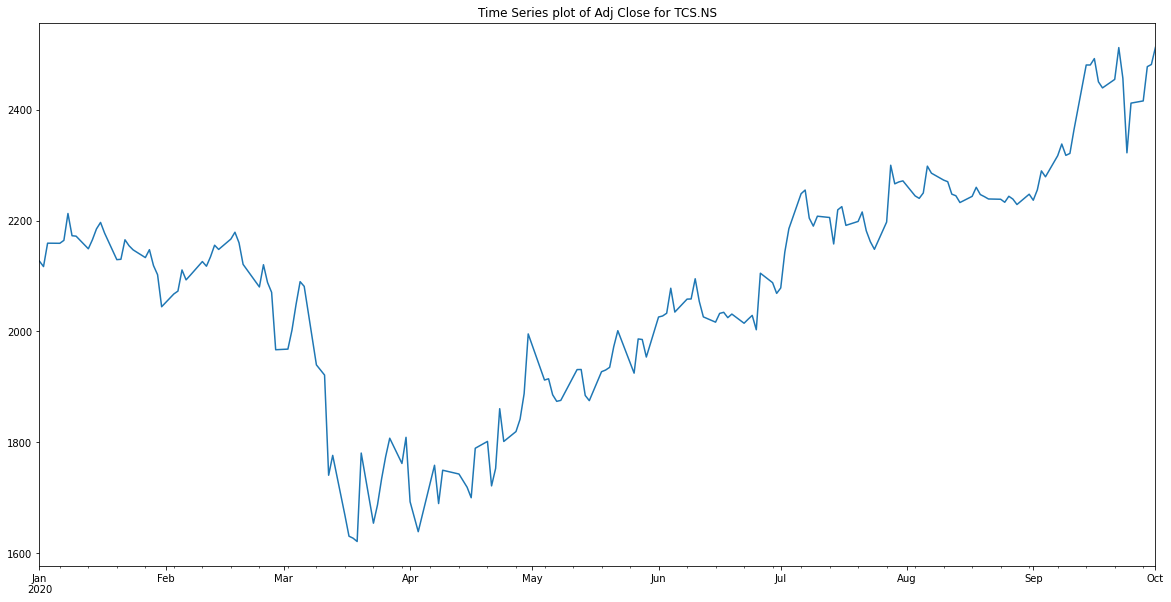

The maximum Adj Close was observed on 2020-09-18
The minimum Adj Close was observed on 2020-03-19


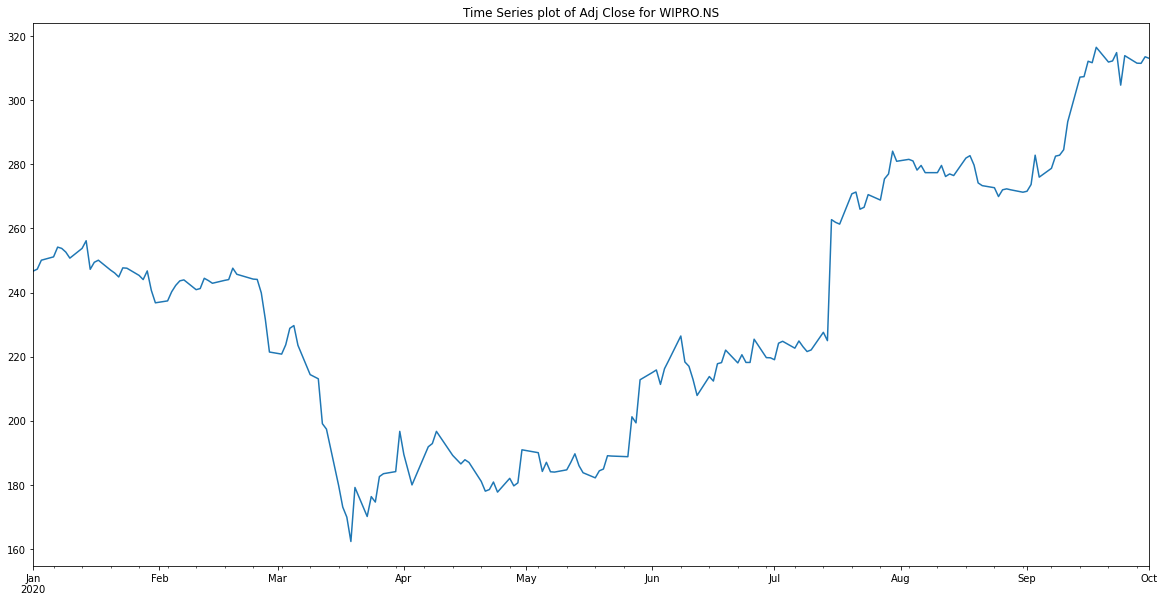

The maximum Adj Close was observed on 2020-09-18
The minimum Adj Close was observed on 2020-03-19


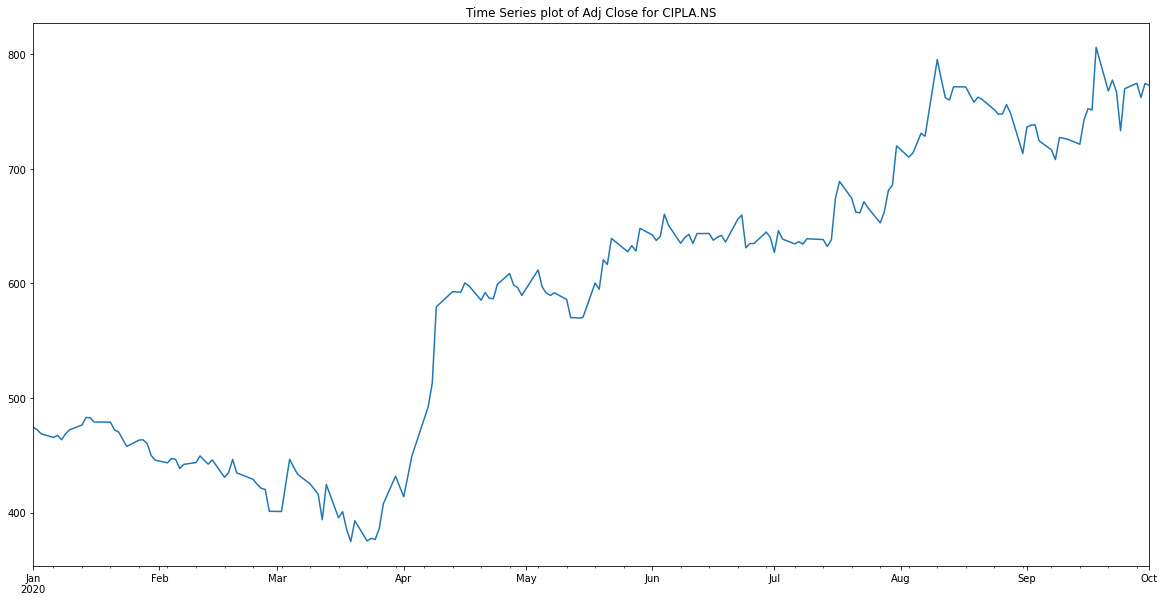

The maximum Adj Close was observed on 2020-01-15
The minimum Adj Close was observed on 2020-03-25


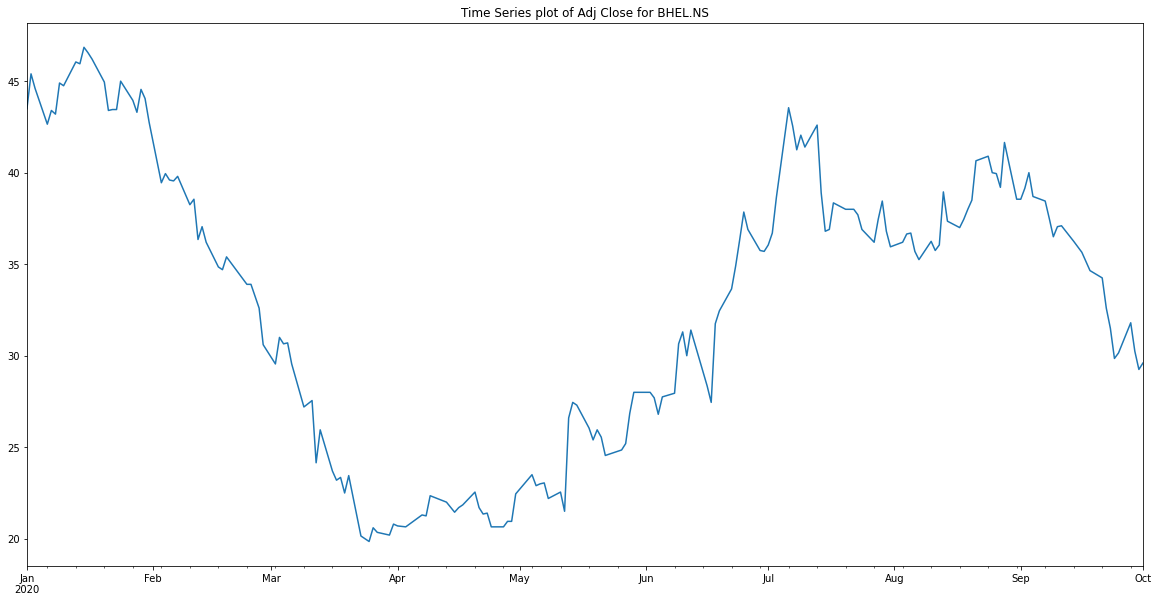

In [10]:
if choice_ts.upper().startswith('Y') or choice_ts.upper().startswith('B'):
    if choice_col.upper().startswith('R') or choice_col.upper().startswith('B'):
        try:
            for stock in stock_list:
                fig = mod.plot_ts(return_dataframe, stock, parameter='returns')
                fig.show()
        except:
            pass
        if choice_col.upper().startswith(column_name.upper()) or choice_col.upper().startswith('B'):
            try:
                for stock in stock_list:
                    fig = mod.plot_ts(final_dataframe, stock, parameter=column_name)
                    fig.show()
            except:
                pass
    

In [11]:
desc_data_returns, corr_returns, cov_returns = mod.descriptive_analysis(return_dataframe)

In [12]:
print('Descriptive data analysis for returns')
display(desc_data_returns)
print('Correlation Matrix for returns')
display(corr_returns)
print('Covariance Matrix for returns')
display(cov_returns)

Descriptive data analysis for returns


,Mean,Median,Mode,Skewness,Kurtosis,Standard Deviation,Min,Max
INFY.NS,0.002166,0.001265,-0.100393,0.264511,4.107935,0.027443,-0.100393,0.120334
TCS.NS,0.001171,0.000879,-0.094103,-0.142079,3.296680,0.023772,-0.094103,0.098451
WIPRO.NS,0.001599,0.000757,0.000000,1.588934,9.778723,0.026071,-0.089412,0.167778
CIPLA.NS,0.002951,-0.000883,-0.068500,1.310323,3.716293,0.026905,-0.068500,0.130375
BHEL.NS,-0.001200,-0.002381,0.000000,1.112089,6.581053,0.041585,-0.140725,0.237209


Correlation Matrix for returns


,INFY.NS,TCS.NS,WIPRO.NS,CIPLA.NS,BHEL.NS
INFY.NS,1.000000,0.744953,0.640776,0.287705,0.261653
TCS.NS,0.744953,1.000000,0.609936,0.274876,0.281456
WIPRO.NS,0.640776,0.609936,1.000000,0.273101,0.207714
CIPLA.NS,0.287705,0.274876,0.273101,1.000000,0.255813
BHEL.NS,0.261653,0.281456,0.207714,0.255813,1.000000


Covariance Matrix for returns


,INFY.NS,TCS.NS,WIPRO.NS,CIPLA.NS,BHEL.NS
INFY.NS,0.000757,0.000489,0.000461,0.000214,0.000300
TCS.NS,0.000489,0.000568,0.000380,0.000177,0.000280
WIPRO.NS,0.000461,0.000380,0.000683,0.000193,0.000226
CIPLA.NS,0.000214,0.000177,0.000193,0.000728,0.000288
BHEL.NS,0.000300,0.000280,0.000226,0.000288,0.001739


In [13]:
desc_data_col, corr_col, cov_col = mod.descriptive_analysis(final_dataframe)

In [14]:
print(f'Descriptive data anlaysis for {column_name}')
display(desc_data_col)
print(f'Correlation Matrix for {column_name}')
display(corr_col)
print(f'Covariance Matrix for {column_name}')
display(cov_col)

Descriptive data anlaysis for Adj Close


,Mean,Median,Mode,Skewness,Kurtosis,Standard Deviation,Min,Max
INFY.NS,778.879893,757.242188,664.652588,0.352335,-1.010225,129.124447,519.380066,1019.750000
TCS.NS,2086.068225,2118.895508,2165.411377,-0.307848,-0.333178,205.049376,1620.991089,2512.736816
WIPRO.NS,235.619028,239.899994,187.050003,0.165301,-0.933361,39.855711,162.350006,316.500000
CIPLA.NS,589.651745,620.650024,472.273315,-0.143963,-1.286044,124.182853,374.700012,806.250000
BHEL.NS,33.123016,35.250000,38.000000,-0.195128,-1.125252,7.659248,19.850000,46.849998


Correlation Matrix for Adj Close


,INFY.NS,TCS.NS,WIPRO.NS,CIPLA.NS,BHEL.NS
INFY.NS,1.000000,0.914640,0.950993,0.705654,0.557239
TCS.NS,0.914640,1.000000,0.936661,0.598490,0.706972
WIPRO.NS,0.950993,0.936661,1.000000,0.553518,0.663145
CIPLA.NS,0.705654,0.598490,0.553518,1.000000,0.138044
BHEL.NS,0.557239,0.706972,0.663145,0.138044,1.000000


Covariance Matrix for Adj Close


,INFY.NS,TCS.NS,WIPRO.NS,CIPLA.NS,BHEL.NS
INFY.NS,16761.809645,24345.625400,4920.174477,11375.373961,554.039181
TCS.NS,24345.625400,42268.891346,7695.474021,15320.773375,1116.221984
WIPRO.NS,4920.174477,7695.474021,1596.927047,2754.151054,203.511522
CIPLA.NS,11375.373961,15320.773375,2754.151054,15503.409633,131.998471
BHEL.NS,554.039181,1116.221984,203.511522,131.998471,58.976130


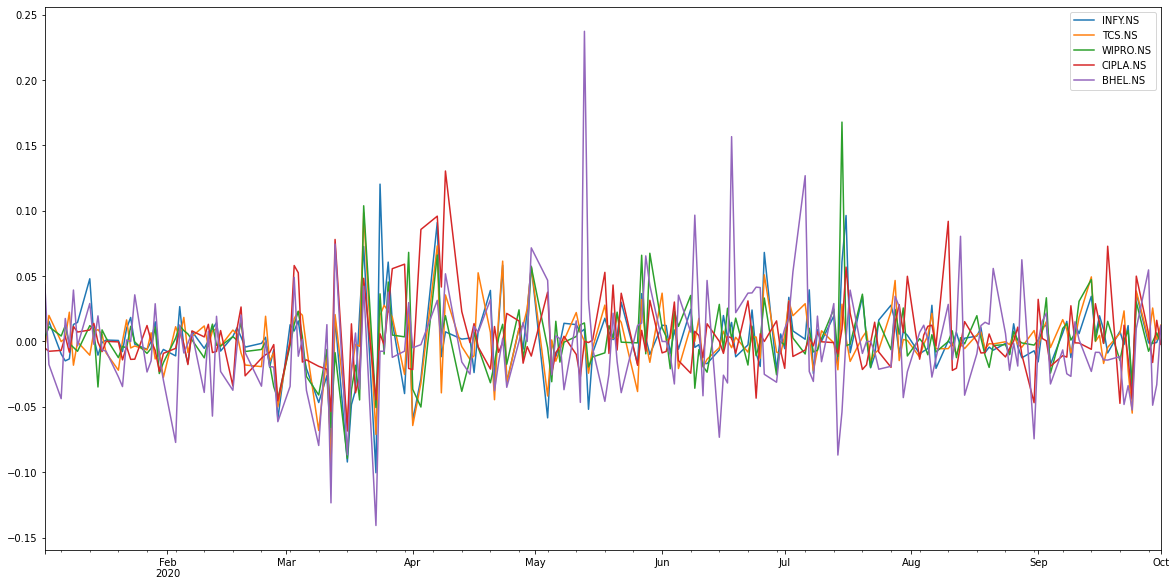

,Stock
Max avg returns,CIPLA.NS
Min avg returns,BHEL.NS
Most Vollatile returns,BHEL.NS
Least Volatile returns,TCS.NS
Most Skewed returns,WIPRO.NS
Least Skewed returns,TCS.NS


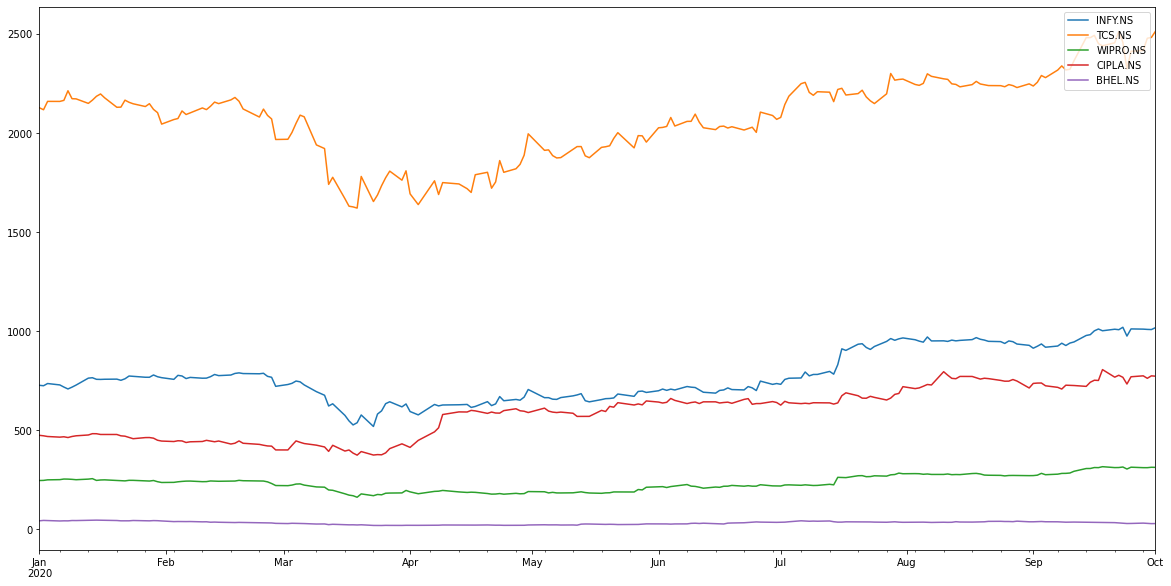

,Stock
Max avg Adj Close,TCS.NS
Min avg Adj Close,BHEL.NS
Most Vollatile Adj Close,TCS.NS
Least Volatile Adj Close,BHEL.NS
Most Skewed Adj Close,INFY.NS
Least Skewed Adj Close,TCS.NS


In [15]:
if choice_comparitive.upper().startswith('Y'):
    if choice_col.upper().startswith('R') or choice_col.upper().startswith('B'):
        comp_returns = mod.comparitive(return_dataframe, parameter = 'returns')
        display(comp_returns)
    if choice_col.upper().startswith(column_name.upper()) or choice_col.upper().startswith('B'):
        comp_col = mod.comparitive(final_dataframe, parameter=column_name)
        display(comp_col)



```
Thank you for using this notebook
Regrads, 
Sahira Sheikh
```

